In [1]:
from planet4 import clustering, io, markings, stats, plotting
from pathlib import Path

In [39]:
obsid = 'ESP_012889_0985'

In [2]:
db = io.DBManager()

In [3]:
image_names = db.image_names

In [4]:
len(image_names)

221

In [9]:
sorted(image_names)

['ESP_011296_0975',
 'ESP_011341_0980',
 'ESP_011348_0950',
 'ESP_011350_0945',
 'ESP_011351_0945',
 'ESP_011370_0980',
 'ESP_011394_0935',
 'ESP_011403_0945',
 'ESP_011404_0945',
 'ESP_011406_0945',
 'ESP_011407_0945',
 'ESP_011408_0930',
 'ESP_011413_0970',
 'ESP_011420_0930',
 'ESP_011422_0930',
 'ESP_011431_0930',
 'ESP_011447_0950',
 'ESP_011448_0950',
 'ESP_011460_0980',
 'ESP_011486_0980',
 'ESP_011491_0985',
 'ESP_011515_0980',
 'ESP_011526_0980',
 'ESP_011544_0985',
 'ESP_011557_0985',
 'ESP_011565_0930',
 'ESP_011606_0930',
 'ESP_011623_0985',
 'ESP_011671_0935',
 'ESP_011680_1055',
 'ESP_011697_0980',
 'ESP_011702_0985',
 'ESP_011711_0930',
 'ESP_011723_0945',
 'ESP_011729_0985',
 'ESP_011737_0980',
 'ESP_011776_0930',
 'ESP_011777_0950',
 'ESP_011792_0980',
 'ESP_011842_0980',
 'ESP_011843_0950',
 'ESP_011856_0930',
 'ESP_011900_0985',
 'ESP_011921_0950',
 'ESP_011931_0945',
 'ESP_011934_0945',
 'ESP_011960_0925',
 'ESP_011961_0935',
 'ESP_012008_0975',
 'ESP_012028_0930',


In [5]:
db.dbname

'/Users/klay6683/Dropbox/data/planet4/2016-05-29_planet_four_classifications_queryable_cleaned_seasons2and3.h5'

In [6]:
all_image_ids = db.image_ids

In [7]:
len(all_image_idse_ids)

42904

In [41]:
data = db.get_image_name_markings(obsid)

In [42]:
image_ids = data.image_id.unique()

In [43]:
len(image_ids)

72

In [44]:
saveroot = Path("/Volumes/Data/planet4/new_pipeline")

In [45]:
saveroot = saveroot / obsid
saveroot.mkdir(exist_ok=True)

In [46]:
cm = clustering.ClusteringManager(db.dbname, scope='planet4', output_dir=saveroot,
                                  min_samples_factor=0.15, do_dynamic_min_samples=True,
                                  quiet=True)

In [47]:
for image_id in image_ids:
    print(image_id)
    cm.cluster_image_id(image_id)

APF000018s
n_classifications: 50
min_samples: 8
APF000017l
n_classifications: 44
min_samples: 7
APF000019j
n_classifications: 34
min_samples: 5
APF0000187
n_classifications: 59
min_samples: 9
APF000019a
n_classifications: 34
min_samples: 5
APF0000197
n_classifications: 61
min_samples: 9
APF0000198
n_classifications: 35
min_samples: 5
APF000017m
n_classifications: 40
min_samples: 6
APF000018h
n_classifications: 32
min_samples: 5
APF000018r
n_classifications: 37
min_samples: 6
APF0000184
n_classifications: 47
min_samples: 7
APF0000185
n_classifications: 38
min_samples: 6
APF000018x
n_classifications: 32
min_samples: 5
APF000018g
n_classifications: 48
min_samples: 7
APF000017v
n_classifications: 32
min_samples: 5
APF000017r
n_classifications: 30
min_samples: 4
APF000018p
n_classifications: 39
min_samples: 6
APF0000195
n_classifications: 62
min_samples: 9
APF000018q
n_classifications: 34
min_samples: 5
APF0000199
n_classifications: 42
min_samples: 6
APF000018f
n_classifications: 44
min_sam

In [54]:
blotchfiles = (saveroot / 'just_clustering').glob('*_blotches.csv')
fanfiles = (saveroot / 'just_clustering').glob('*_fans.csv')

In [55]:
blotches = []
for bf in blotchfiles:
    blotches.append(pd.read_csv(bf))
    
blotches = pd.concat(blotches)

In [56]:
blotches.head()

,x,y,image_x,image_y,angle,radius_1,radius_2,p1_x,p1_y,p2_x,p2_y,p3_x,p3_y,p4_x,p4_y,image_id,n_members
0,676.071493,71.847369,676.071493,1715.847369,69.810632,145.247168,120.403847,726.199782,164.927801,625.943204,-21.233064,563.065609,113.401630,789.077376,30.293107,APF000017k,20
1,825.322541,448.097167,825.322541,2092.097167,61.654026,110.754146,81.332115,877.908006,345.785141,772.737077,550.409193,753.742419,486.713211,896.902664,409.481122,APF000017k,13
2,281.383774,379.846493,281.383774,2023.846493,28.081339,156.262901,109.101008,419.251441,409.817510,143.516107,349.875475,230.027250,476.104154,332.740297,283.588832,APF000017k,12
3,14.600000,336.200000,14.600000,1980.200000,44.255261,71.404175,53.553131,65.742374,355.449647,-36.542374,316.950353,-22.772386,374.556780,51.972386,297.843220,APF000017k,5
4,111.889478,463.884213,111.889478,2107.884213,41.589543,74.993685,56.245264,167.978698,412.829370,55.800257,514.939057,74.554450,505.951129,149.224505,421.817298,APF000017k,5


In [59]:
%matplotlib nbagg

In [66]:
blotches.image_y.max()

19819.555555555558

<IPython.core.display.Javascript object>


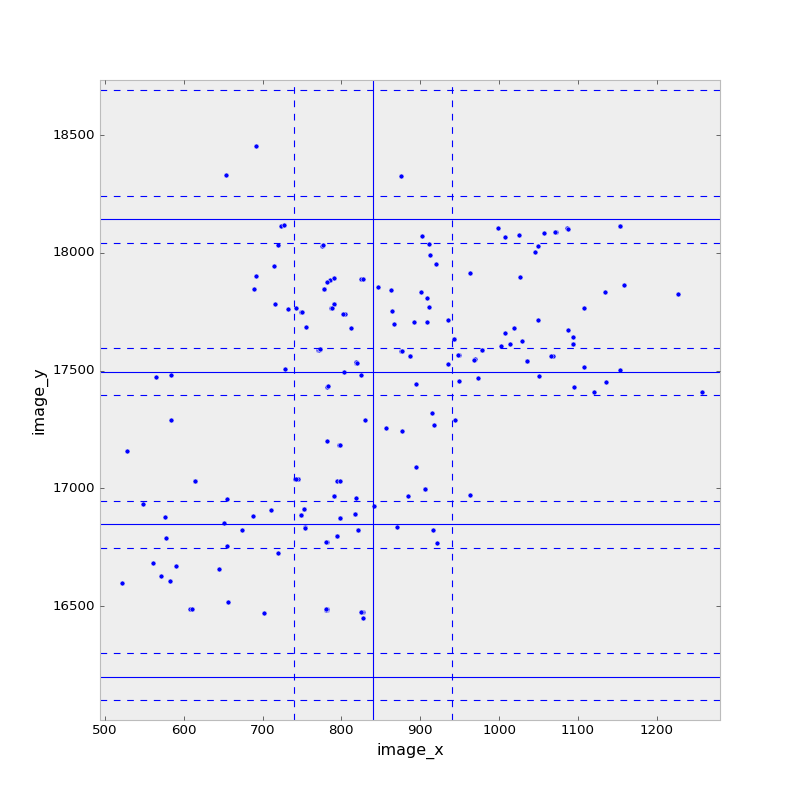

In [71]:
fig, ax = plt.subplots()
blotches.plot(ax=ax, kind='scatter', x='image_x', y='image_y', grid=False)
for x in range(0, 2000, 840):
    ax.axvline(x=x, lw=1)
    ax.axvline(x=x-100, lw=1, ls='--')
    ax.axvline(x=x+100, lw=1, ls='--')
for y in range(0, int(blotches.image_y.max()), 648):
    ax.axhline(y=y, lw=1)
    ax.axhline(y=y-100, lw=1, ls='--')
    ax.axhline(y=y+100, lw=1, ls='--')

In [61]:
blotches.columns

Index(['x', 'y', 'image_x', 'image_y', 'angle', 'radius_1', 'radius_2', 'p1_x',
       'p1_y', 'p2_x', 'p2_y', 'p3_x', 'p3_y', 'p4_x', 'p4_y', 'image_id',
       'n_members'],
      dtype='object')